<a href="https://colab.research.google.com/github/cxmedeiros/Bioinspirada/blob/main/Projeto_das_8_rainhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema das 8 Rainhas** ❗


O problema das 8 rainhas é um famoso problema de colocação de peças de xadrez em um tabuleiro de xadrez 8x8 de modo que nenhuma rainha ameace outra. A tarefa é posicionar oito rainhas de xadrez em um tabuleiro de xadrez de tal forma que nenhuma rainha possa atacar outra, ou seja, não pode haver duas rainhas na mesma linha, coluna ou diagonal.

## **Parâmetros para a parte 1:**
* Representação (genótipo): Permutação de string de bits
* Recombinação: “cut-and-crossfill” crossover
* Probabilidade de Recombinação: 90%
* Mutação: troca de genes
* Probabilidade de Mutação: 40%
* Seleção de pais: ranking - Melhor de 2 de 5 escolhidos
aleatoriamente
* Seleção de sobreviventes: substituição do pior
* Tamanho da população: 100
* Número de filhos gerados: 2
* Inicialização: aleatória
* Condição de término: Encontrar a solução, ou 10.000
avaliações de fitness

## **Grupo:** 📚
*   Breno Mendes (bmmuc)
* Camila Xavier (cxm)
* Victor Silva (vsmo)


# Implementação 💻

Execution 1
Geração: 47, Fitness Médio: 26.410, Convergências: 1
Execution 2
Geração: 53, Fitness Médio: 26.420, Convergências: 2
Execution 3
Geração: 35, Fitness Médio: 26.110, Convergências: 1
Execution 4
Geração: 110, Fitness Médio: 27.010, Convergências: 1
Execution 5
Geração: 28, Fitness Médio: 26.150, Convergências: 1
Execution 6
Geração: 27, Fitness Médio: 25.910, Convergências: 1
Execution 7
Geração: 39, Fitness Médio: 26.250, Convergências: 1
Execution 8
Geração: 1, Fitness Médio: 24.010, Convergências: 1
Execution 9
Geração: 56, Fitness Médio: 26.670, Convergências: 1
Execution 10
Geração: 66, Fitness Médio: 26.310, Convergências: 1
Execution 11
Geração: 1, Fitness Médio: 23.880, Convergências: 1
Execution 12
Geração: 52, Fitness Médio: 26.480, Convergências: 1
Execution 13
Geração: 29, Fitness Médio: 26.240, Convergências: 1
Execution 14
Geração: 25, Fitness Médio: 26.070, Convergências: 1
Execution 15
Geração: 13, Fitness Médio: 25.420, Convergências: 1
Execution 16
Geração

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


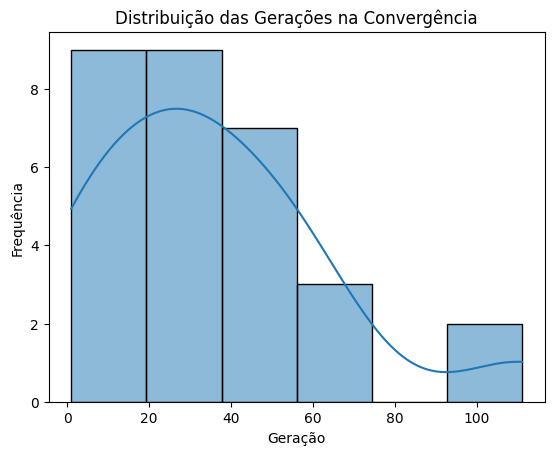

In [ ]:
import itertools
import numpy as np
import pandas as pd
from itertools import permutations
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

def fitness(individuals):
    total_fitness = []
    for chromosome in individuals:
        clashes = 0
        for i in range(8):
            for j in range(i + 1, 8):
                if int(chromosome[i], 2) == int(chromosome[j], 2):
                    clashes += 1
                if abs(i - j) == abs(int(chromosome[i], 2) - int(chromosome[j], 2)):
                    clashes += 1
        total_fitness.append(28 - clashes)
    return total_fitness

def percent_fit(fitness_vector):
    total = sum(fitness_vector)
    return [round(fit / total, 4) for fit in fitness_vector]

def select_parents(total_fitness, individuals):
    parent_indices = np.random.choice(range(len(individuals)), 5)
    parent_fitness = sorted([(idx, total_fitness[idx]) for idx in parent_indices], key=lambda x: x[1])
    return [individuals[parent_fitness[i][0]] for i in range(2)]

def crossover(parent1, parent2):
    cross_point = random.randint(1, 7)
    child1 = np.append(parent1[:cross_point], parent2[cross_point:])
    child2 = np.append(parent2[:cross_point], parent1[cross_point:])
    return np.array([child1, child2])

def mutate(chromosome):
    gene1, gene2 = random.sample(range(8), 2)
    chromosome[gene1], chromosome[gene2] = chromosome[gene2], chromosome[gene1]
    return chromosome

def generate_population(population_size, fitness_total, individuals):
    new_generation = []
    parents = [select_parents(fitness_total, individuals) for _ in range(population_size // 2)]
    for parent1, parent2 in parents:
        if random.uniform(0, 1) < 0.9:  # crossover probability
            children = crossover(parent1, parent2)
            new_generation.extend(children)
    return np.array(new_generation)

def apply_mutation(new_generation):
    for i in range(len(new_generation)):
        if random.uniform(0, 1) < 0.4:  # mutation probability
            new_generation[i] = mutate(new_generation[i])
    return new_generation

def evaluate(new_generation, individuals, population_size):
    combined = np.concatenate((individuals, new_generation), axis=0)
    fitness_total = fitness(combined)
    sorted_individuals = sorted(zip(combined, fitness_total), key=lambda x: x[1], reverse=True)
    top_individuals = [ind for ind, fit in sorted_individuals[:population_size]]
    return np.array(top_individuals), fitness(top_individuals)

def initialize_population(population_size):
    binary_combinations = ["".join(seq) for seq in itertools.product("01", repeat=3)]
    all_permutations = list(permutations(binary_combinations))
    initial_population = [all_permutations[np.random.randint(len(all_permutations))] for _ in range(population_size)]
    return np.array(initial_population)

def run_algorithm(population_size=100, max_iterations=10000, total_convergence=False):
    individuals = initialize_population(population_size)
    for generation in range(max_iterations):
        fitness_total = fitness(individuals)
        new_generation = generate_population(population_size, fitness_total, individuals)
        new_generation = apply_mutation(new_generation)
        individuals, fitness_total = evaluate(new_generation, individuals, population_size)

        if 28 in fitness_total:
            convergence_count = fitness_total.count(28)
            if total_convergence and convergence_count == population_size:
                return generation + 1, np.mean(fitness_total), convergence_count
            elif not total_convergence:
                return generation + 1, np.mean(fitness_total), convergence_count
    return max_iterations, np.mean(fitness_total), 0

def main():
    start_time = time.time()
    all_generations = []
    all_fitness = []
    convergences = []
    execution_times = []

    for execution in range(30):
        print(f"Execution {execution + 1}")
        generation, avg_fitness, convergence = run_algorithm(total_convergence=False)
        all_generations.append(generation)
        all_fitness.append(avg_fitness)
        convergences.append(convergence)
        print(f"Geração: {generation}, Fitness Médio: {avg_fitness:.3f}, Convergências: {convergence}")

    mean_generation = np.mean(all_generations)
    std_generation = np.std(all_generations)
    total_convergence = sum(convergences)
    mean_fitness = np.mean(all_fitness)
    std_fitness = np.std(all_fitness)
    mean_convergence = np.mean(convergences)
    mean_execution_time = np.mean(execution_times)

    # Print summary results
    print("Resumo:")
    print(f"Média de iterações para convergência: {mean_generation:.3f}")
    print(f"Desvio padrão das iterações de convergência: {std_generation:.3f}")
    print(f"Fitness Médio nas 30 execuções: {mean_fitness:.3f}")
    print(f"Desvio padrão do Fitness: {std_fitness:.3f}")
    print(f"Número de convergências em 30 execuções: {min(total_convergence, 30)}/30")
    print(f"Número de indivíduos convergentes: {total_convergence}")
    print(f"Média de indivíduos convergentes por execução: {mean_convergence:.3f}")

    sns.histplot(all_generations, kde=True)
    plt.xlabel('Geração')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Gerações na Convergência')
    plt.show()


if __name__ == '__main__':
    main()


## **Parâmetros para a parte 2:**
*Implementar possíveis melhorias mudando:*
* Representação
* Recombinação
* Mutação
* Seleção de pais – roleta?
* Seleção de sobreviventes: geracional ou substituição
do pior
* Tamanho da população: 10? 30? 50? 70? 120? 200?
* O fitness pode ser melhorado?

## Alterações Realizadas
### Método de Seleção de Pais - Seleção por Roleta:
**Antes**: A seleção de pais era baseada em ranking, selecionando os melhores pais de um subconjunto aleatório.

**Depois**: Implementei a seleção por roleta, onde a probabilidade de um indivíduo ser escolhido como pai é proporcional ao seu fitness. Isso introduz mais diversidade, pois permite que indivíduos com fitness menor, mas não nulo, tenham chances de ser selecionados.

**Por quê?**: A seleção por roleta pode ajudar a manter a diversidade genética na população, o que é crucial para evitar a convergência prematura para ótimos locais.

Execution 1
Geração: 266, Fitness Médio: 27.010, Convergências: 1
Execution 2
Geração: 7, Fitness Médio: 25.330, Convergências: 1
Execution 3
Geração: 17, Fitness Médio: 26.180, Convergências: 1
Execution 4
Geração: 1, Fitness Médio: 24.050, Convergências: 1
Execution 5
Geração: 21, Fitness Médio: 26.370, Convergências: 1
Execution 6
Geração: 31, Fitness Médio: 27.010, Convergências: 1
Execution 7
Geração: 21, Fitness Médio: 26.450, Convergências: 1
Execution 8
Geração: 104, Fitness Médio: 27.010, Convergências: 1
Execution 9
Geração: 32, Fitness Médio: 27.010, Convergências: 1
Execution 10
Geração: 1, Fitness Médio: 24.050, Convergências: 1
Execution 11
Geração: 13, Fitness Médio: 26.210, Convergências: 1
Execution 12
Geração: 1, Fitness Médio: 24.290, Convergências: 1
Execution 13
Geração: 6, Fitness Médio: 25.410, Convergências: 1
Execution 14
Geração: 16, Fitness Médio: 26.210, Convergências: 1
Execution 15
Geração: 1, Fitness Médio: 24.270, Convergências: 1
Execution 16
Geração: 2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


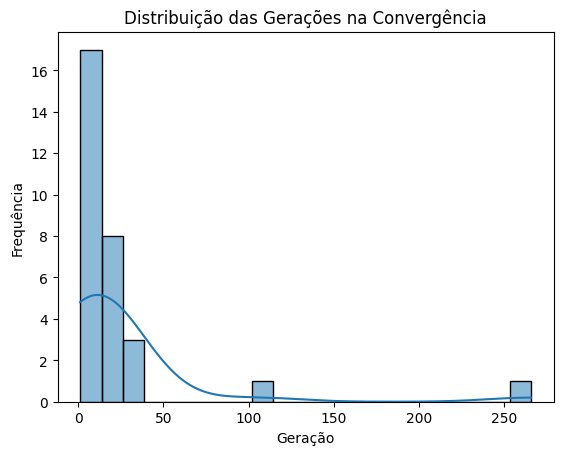

In [ ]:
import itertools
import numpy as np
import pandas as pd
from itertools import permutations
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

def fitness(individuals):
    total_fitness = []
    for chromosome in individuals:
        clashes = 0
        for i in range(8):
            for j in range(i + 1, 8):
                if int(chromosome[i], 2) == int(chromosome[j], 2):
                    clashes += 1
                if abs(i - j) == abs(int(chromosome[i], 2) - int(chromosome[j], 2)):
                    clashes += 1
        total_fitness.append(28 - clashes)
    return total_fitness

def percent_fit(fitness_vector):
    total = sum(fitness_vector)
    return [round(fit / total, 4) for fit in fitness_vector]

def crossover(parent1, parent2):
    cross_point = random.randint(1, 7)
    child1 = np.append(parent1[:cross_point], parent2[cross_point:])
    child2 = np.append(parent2[:cross_point], parent1[cross_point:])
    return np.array([child1, child2])

def mutate(chromosome):
    gene1, gene2 = random.sample(range(8), 2)
    chromosome[gene1], chromosome[gene2] = chromosome[gene2], chromosome[gene1]
    return chromosome

def select_parents_roulette(total_fitness, individuals):
    fitness_sum = sum(total_fitness)
    if fitness_sum == 0:
        return random.sample(list(individuals), 2)  # Caso o fitness total seja 0, seleciona aleatoriamente

    probabilities = [fit / fitness_sum for fit in total_fitness]
    selected_indices = np.random.choice(len(individuals), size=2, p=probabilities, replace=False)
    parents = [individuals[idx] for idx in selected_indices]
    return parents

def generate_population(population_size, fitness_total, individuals):
    new_generation = []
    for _ in range(population_size // 2):
        parents = select_parents_roulette(fitness_total, individuals)
        if random.uniform(0, 1) < 0.9:  # crossover probability
            children = crossover(parents[0], parents[1])
            new_generation.extend(children)
    return np.array(new_generation)

def apply_mutation(new_generation):
    for i in range(len(new_generation)):
        if random.uniform(0, 1) < 0.4:  # mutation probability
            new_generation[i] = mutate(new_generation[i])
    return new_generation

def evaluate(new_generation, individuals, population_size):
    combined = np.concatenate((individuals, new_generation), axis=0)
    fitness_total = fitness(combined)
    sorted_individuals = sorted(zip(combined, fitness_total), key=lambda x: x[1], reverse=True)
    top_individuals = [ind for ind, fit in sorted_individuals[:population_size]]
    return np.array(top_individuals), fitness(top_individuals)

def initialize_population(population_size):
    binary_combinations = ["".join(seq) for seq in itertools.product("01", repeat=3)]
    all_permutations = list(permutations(binary_combinations))
    initial_population = [all_permutations[np.random.randint(len(all_permutations))] for _ in range(population_size)]
    return np.array(initial_population)

def run_algorithm(population_size=100, max_iterations=10000, total_convergence=False):
    individuals = initialize_population(population_size)
    for generation in range(max_iterations):
        fitness_total = fitness(individuals)
        new_generation = generate_population(population_size, fitness_total, individuals)
        new_generation = apply_mutation(new_generation)
        individuals, fitness_total = evaluate(new_generation, individuals, population_size)

        if 28 in fitness_total:
            convergence_count = fitness_total.count(28)
            if total_convergence and convergence_count == population_size:
                return generation + 1, np.mean(fitness_total), convergence_count
            elif not total_convergence:
                return generation + 1, np.mean(fitness_total), convergence_count
    return max_iterations, np.mean(fitness_total), 0

def main():
    start_time = time.time()
    all_generations = []
    all_fitness = []
    convergences = []
    execution_times = []

    for execution in range(30):
        print(f"Execution {execution + 1}")
        generation, avg_fitness, convergence = run_algorithm(total_convergence=False)
        all_generations.append(generation)
        all_fitness.append(avg_fitness)
        convergences.append(convergence)
        print(f"Geração: {generation}, Fitness Médio: {avg_fitness:.3f}, Convergências: {convergence}")

    mean_generation = np.mean(all_generations)
    std_generation = np.std(all_generations)
    total_convergence = sum(convergences)
    mean_fitness = np.mean(all_fitness)
    std_fitness = np.std(all_fitness)
    mean_convergence = np.mean(convergences)
    mean_execution_time = np.mean(execution_times)

    # Print summary results
    print("Resumo:")
    print(f"Média de iterações para convergência: {mean_generation:.3f}")
    print(f"Desvio padrão das iterações de convergência: {std_generation:.3f}")
    print(f"Fitness Médio nas 30 execuções: {mean_fitness:.3f}")
    print(f"Desvio padrão do Fitness: {std_fitness:.3f}")
    print(f"Número de convergências em 30 execuções: {min(total_convergence, 30)}/30")
    print(f"Número de indivíduos convergentes: {total_convergence}")
    print(f"Média de indivíduos convergentes por execução: {mean_convergence:.3f}")

    sns.histplot(all_generations, kde=True)
    plt.xlabel('Geração')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Gerações na Convergência')
    plt.show()


if __name__ == '__main__':
    main()

## Alterações Realizadas
### Mudança de representação - Números inteiros em vez de binários:
**Antes**: A representação dos cromossomos era feita usando combinações binárias de 3 bits.

**Depois**: Modifiquei a representação para usar números inteiros de 0 a 7 para cada gene do cromossomo. Isso permite uma representação mais direta e natural dos indivíduos.

**Por quê?**: A representação com números inteiros simplifica o cálculo de fitness e evita a necessidade de conversões entre binário e decimal. Além disso, torna a representação mais intuitiva e fácil de entender, o que facilita a análise do comportamento do algoritmo genético.

Execution 1
Geração: 72, Fitness Médio: 27.010, Convergências: 1
Execution 2
Geração: 77, Fitness Médio: 27.010, Convergências: 1
Execution 3
Geração: 1, Fitness Médio: 24.180, Convergências: 1
Execution 4
Geração: 1, Fitness Médio: 24.340, Convergências: 2
Execution 5
Geração: 15, Fitness Médio: 26.040, Convergências: 1
Execution 6
Geração: 23, Fitness Médio: 26.350, Convergências: 1
Execution 7
Geração: 11, Fitness Médio: 26.100, Convergências: 1
Execution 8
Geração: 1, Fitness Médio: 24.320, Convergências: 1
Execution 9
Geração: 13, Fitness Médio: 26.120, Convergências: 1
Execution 10
Geração: 48, Fitness Médio: 27.010, Convergências: 1
Execution 11
Geração: 1, Fitness Médio: 24.120, Convergências: 1
Execution 12
Geração: 35, Fitness Médio: 27.010, Convergências: 1
Execution 13
Geração: 136, Fitness Médio: 27.010, Convergências: 1
Execution 14
Geração: 41, Fitness Médio: 27.010, Convergências: 1
Execution 15
Geração: 23, Fitness Médio: 26.680, Convergências: 1
Execution 16
Geração: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


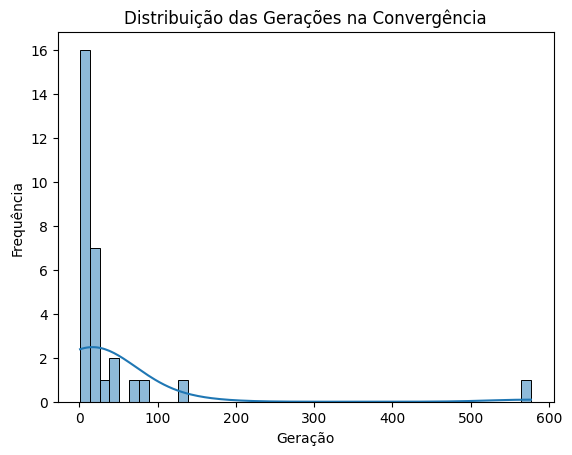

In [ ]:
import itertools
import numpy as np
import pandas as pd
from itertools import permutations
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

def fitness(individuals):
    total_fitness = []
    for chromosome in individuals:
        clashes = 0
        for i in range(8):
            for j in range(i + 1, 8):
                if chromosome[i] == chromosome[j]:
                    clashes += 1
                if abs(i - j) == abs(int(chromosome[i]) - int(chromosome[j])):
                    clashes += 1
        total_fitness.append(28 - clashes)
    return total_fitness

def percent_fit(fitness_vector):
    total = sum(fitness_vector)
    return [round(fit / total, 4) for fit in fitness_vector]

def crossover(parent1, parent2):
    cross_point = random.randint(1, 7)
    child1 = np.append(parent1[:cross_point], parent2[cross_point:])
    child2 = np.append(parent2[:cross_point], parent1[cross_point:])
    return np.array([child1, child2])

def mutate(chromosome):
    gene1, gene2 = random.sample(range(8), 2)
    chromosome[gene1], chromosome[gene2] = chromosome[gene2], chromosome[gene1]
    return chromosome

def select_parents_roulette(total_fitness, individuals):
    fitness_sum = sum(total_fitness)
    if fitness_sum == 0:
        return random.sample(list(individuals), 2)  # Caso o fitness total seja 0, seleciona aleatoriamente

    probabilities = [fit / fitness_sum for fit in total_fitness]
    selected_indices = np.random.choice(len(individuals), size=2, p=probabilities, replace=False)
    parents = [individuals[idx] for idx in selected_indices]
    return parents

def generate_population(population_size, fitness_total, individuals):
    new_generation = []
    for _ in range(population_size // 2):
        parents = select_parents_roulette(fitness_total, individuals)
        if random.uniform(0, 1) < 0.9:  # crossover probability
            children = crossover(parents[0], parents[1])
            new_generation.extend(children)
    return np.array(new_generation)

def apply_mutation(new_generation):
    for i in range(len(new_generation)):
        if random.uniform(0, 1) < 0.4:  # mutation probability
            new_generation[i] = mutate(new_generation[i])
    return new_generation

def evaluate(new_generation, individuals, population_size):
    combined = np.concatenate((individuals, new_generation), axis=0)
    fitness_total = fitness(combined)
    sorted_individuals = sorted(zip(combined, fitness_total), key=lambda x: x[1], reverse=True)
    top_individuals = [ind for ind, fit in sorted_individuals[:population_size]]
    return np.array(top_individuals), fitness(top_individuals)

def initialize_population(population_size):
    initial_population = []
    while len(initial_population) < population_size:
        chromosome = np.random.permutation(8)
        chromosome = [str(num) for num in chromosome]
        if chromosome not in initial_population:
            initial_population.append(chromosome)
    return np.array(initial_population)

def run_algorithm(population_size=100, max_iterations=10000, total_convergence=False):
    individuals = initialize_population(population_size)
    for generation in range(max_iterations):
        fitness_total = fitness(individuals)
        new_generation = generate_population(population_size, fitness_total, individuals)
        new_generation = apply_mutation(new_generation)
        individuals, fitness_total = evaluate(new_generation, individuals, population_size)

        if 28 in fitness_total:
            convergence_count = fitness_total.count(28)
            if total_convergence and convergence_count == population_size:
                return generation + 1, np.mean(fitness_total), convergence_count
            elif not total_convergence:
                return generation + 1, np.mean(fitness_total), convergence_count
    return max_iterations, np.mean(fitness_total), 0

def main():
    start_time = time.time()
    all_generations = []
    all_fitness = []
    convergences = []
    execution_times = []

    for execution in range(30):
        print(f"Execution {execution + 1}")
        generation, avg_fitness, convergence = run_algorithm(total_convergence=False)
        all_generations.append(generation)
        all_fitness.append(avg_fitness)
        convergences.append(convergence)
        print(f"Geração: {generation}, Fitness Médio: {avg_fitness:.3f}, Convergências: {convergence}")

    mean_generation = np.mean(all_generations)
    std_generation = np.std(all_generations)
    total_convergence = sum(convergences)
    mean_fitness = np.mean(all_fitness)
    std_fitness = np.std(all_fitness)
    mean_convergence = np.mean(convergences)
    mean_execution_time = np.mean(execution_times)

    # Print summary results
    print("Resumo:")
    print(f"Média de iterações para convergência: {mean_generation:.3f}")
    print(f"Desvio padrão das iterações de convergência: {std_generation:.3f}")
    print(f"Fitness Médio nas 30 execuções: {mean_fitness:.3f}")
    print(f"Desvio padrão do Fitness: {std_fitness:.3f}")
    print(f"Número de convergências em 30 execuções: {min(total_convergence, 30)}/30")
    print(f"Número de indivíduos convergentes: {total_convergence}")
    print(f"Média de indivíduos convergentes por execução: {mean_convergence:.3f}")

    sns.histplot(all_generations, kde=True)
    plt.xlabel('Geração')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Gerações na Convergência')
    plt.show()


if __name__ == '__main__':
    main()

## Alterações Realizadas
### Aumento da Taxa de Mutação:

**Antes**: A taxa de mutação estava definida em um valor mais baixo (por exemplo, 0.4), o que significava que a mutação ocorria com menor frequência.

**Depois**: Aumentei a taxa de mutação para um valor mais elevado (por exemplo, 0.7). Com isso, as mutações agora acontecem mais frequentemente durante a evolução da população.

**Por quê?**: Aumentar a taxa de mutação pode ajudar a introduzir mais diversidade genética na população. Isso é particularmente útil para evitar a convergência prematura em soluções locais subótimas. Uma maior taxa de mutação encoraja a exploração de novas áreas do espaço de busca, o que pode levar à descoberta de melhores soluções. Além disso, isso pode ser benéfico em estágios posteriores do algoritmo, onde a diversidade tende a diminuir, dando uma chance maior de escapar de ótimos locais.

Execution 1
Geração: 37, Fitness Médio: 25.970, Convergências: 1
Execution 2
Geração: 25, Fitness Médio: 25.720, Convergências: 1
Execution 3
Geração: 24, Fitness Médio: 25.980, Convergências: 1
Execution 4
Geração: 10, Fitness Médio: 25.150, Convergências: 1
Execution 5
Geração: 41, Fitness Médio: 26.210, Convergências: 1
Execution 6
Geração: 52, Fitness Médio: 26.280, Convergências: 1
Execution 7
Geração: 20, Fitness Médio: 25.480, Convergências: 1
Execution 8
Geração: 1, Fitness Médio: 23.950, Convergências: 1
Execution 9
Geração: 1, Fitness Médio: 24.320, Convergências: 1
Execution 10
Geração: 1, Fitness Médio: 23.770, Convergências: 1
Execution 11
Geração: 38, Fitness Médio: 26.190, Convergências: 1
Execution 12
Geração: 39, Fitness Médio: 26.180, Convergências: 1
Execution 13
Geração: 42, Fitness Médio: 26.170, Convergências: 1
Execution 14
Geração: 1, Fitness Médio: 24.160, Convergências: 1
Execution 15
Geração: 33, Fitness Médio: 25.810, Convergências: 2
Execution 16
Geração: 3

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


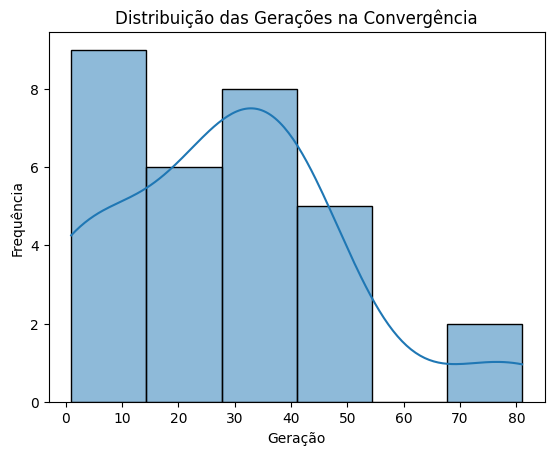

In [ ]:
import itertools
import numpy as np
import pandas as pd
from itertools import permutations
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

def fitness(individuals):
    total_fitness = []
    for chromosome in individuals:
        clashes = 0
        for i in range(8):
            for j in range(i + 1, 8):
                if int(chromosome[i], 2) == int(chromosome[j], 2):
                    clashes += 1
                if abs(i - j) == abs(int(chromosome[i], 2) - int(chromosome[j], 2)):
                    clashes += 1
        total_fitness.append(28 - clashes)
    return total_fitness

def percent_fit(fitness_vector):
    total = sum(fitness_vector)
    return [round(fit / total, 4) for fit in fitness_vector]

def select_parents(total_fitness, individuals):
    parent_indices = np.random.choice(range(len(individuals)), 5)
    parent_fitness = sorted([(idx, total_fitness[idx]) for idx in parent_indices], key=lambda x: x[1])
    return [individuals[parent_fitness[i][0]] for i in range(2)]

def crossover(parent1, parent2):
    cross_point = random.randint(1, 7)
    child1 = np.append(parent1[:cross_point], parent2[cross_point:])
    child2 = np.append(parent2[:cross_point], parent1[cross_point:])
    return np.array([child1, child2])

def mutate(chromosome):
    gene1, gene2 = random.sample(range(8), 2)
    chromosome[gene1], chromosome[gene2] = chromosome[gene2], chromosome[gene1]
    return chromosome

def generate_population(population_size, fitness_total, individuals):
    new_generation = []
    parents = [select_parents(fitness_total, individuals) for _ in range(population_size // 2)]
    for parent1, parent2 in parents:
        if random.uniform(0, 1) < 0.9:  # crossover probability
            children = crossover(parent1, parent2)
            new_generation.extend(children)
    return np.array(new_generation)

def apply_mutation(new_generation):
    for i in range(len(new_generation)):
        if random.uniform(0, 1) < 0.7:  # mutation probability
            new_generation[i] = mutate(new_generation[i])
    return new_generation

def evaluate(new_generation, individuals, population_size):
    combined = np.concatenate((individuals, new_generation), axis=0)
    fitness_total = fitness(combined)
    sorted_individuals = sorted(zip(combined, fitness_total), key=lambda x: x[1], reverse=True)
    top_individuals = [ind for ind, fit in sorted_individuals[:population_size]]
    return np.array(top_individuals), fitness(top_individuals)

def initialize_population(population_size):
    binary_combinations = ["".join(seq) for seq in itertools.product("01", repeat=3)]
    all_permutations = list(permutations(binary_combinations))
    initial_population = [all_permutations[np.random.randint(len(all_permutations))] for _ in range(population_size)]
    return np.array(initial_population)

def run_algorithm(population_size=100, max_iterations=10000, total_convergence=False):
    individuals = initialize_population(population_size)
    for generation in range(max_iterations):
        fitness_total = fitness(individuals)
        new_generation = generate_population(population_size, fitness_total, individuals)
        new_generation = apply_mutation(new_generation)
        individuals, fitness_total = evaluate(new_generation, individuals, population_size)

        if 28 in fitness_total:
            convergence_count = fitness_total.count(28)
            if total_convergence and convergence_count == population_size:
                return generation + 1, np.mean(fitness_total), convergence_count
            elif not total_convergence:
                return generation + 1, np.mean(fitness_total), convergence_count
    return max_iterations, np.mean(fitness_total), 0

def main():
    start_time = time.time()
    all_generations = []
    all_fitness = []
    convergences = []
    execution_times = []

    for execution in range(30):
        print(f"Execution {execution + 1}")
        generation, avg_fitness, convergence = run_algorithm(total_convergence=False)
        all_generations.append(generation)
        all_fitness.append(avg_fitness)
        convergences.append(convergence)
        print(f"Geração: {generation}, Fitness Médio: {avg_fitness:.3f}, Convergências: {convergence}")

    mean_generation = np.mean(all_generations)
    std_generation = np.std(all_generations)
    total_convergence = sum(convergences)
    mean_fitness = np.mean(all_fitness)
    std_fitness = np.std(all_fitness)
    mean_convergence = np.mean(convergences)
    mean_execution_time = np.mean(execution_times)

    # Print summary results
    print("Resumo:")
    print(f"Média de iterações para convergência: {mean_generation:.3f}")
    print(f"Desvio padrão das iterações de convergência: {std_generation:.3f}")
    print(f"Fitness Médio nas 30 execuções: {mean_fitness:.3f}")
    print(f"Desvio padrão do Fitness: {std_fitness:.3f}")
    print(f"Número de convergências em 30 execuções: {min(total_convergence, 30)}/30")
    print(f"Número de indivíduos convergentes: {total_convergence}")
    print(f"Média de indivíduos convergentes por execução: {mean_convergence:.3f}")

    sns.histplot(all_generations, kde=True)
    plt.xlabel('Geração')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Gerações na Convergência')
    plt.show()


if __name__ == '__main__':
    main()


### Alterações Realizadas
## Implementação do Elitismo:

**Antes**: O algoritmo não incluía um mecanismo de elitismo. Portanto, mesmo os indivíduos mais aptos poderiam ser perdidos entre as gerações, o que poderia levar a uma degradação da qualidade geral da população ao longo do tempo.

**Depois**: Introduzi o conceito de elitismo no algoritmo. Agora, os N indivíduos mais aptos de cada geração são automaticamente passados para a próxima geração, garantindo a preservação das melhores soluções encontradas.

**Por quê?**: A implementação do elitismo visa preservar os indivíduos de alta qualidade de uma geração para a outra. Isso é crucial para manter ou melhorar a qualidade geral da população ao longo das gerações. Com o elitismo, reduz-se o risco de perder soluções ótimas devido a processos aleatórios de crossover e mutação. Além disso, ao garantir que os melhores indivíduos sejam mantidos, o algoritmo pode convergir mais rapidamente para uma solução ideal ou próxima dela. Isso também ajuda a manter a diversidade genética na população, permitindo uma exploração mais eficaz do espaço de busca.

Execution 1
Geração: 11, Fitness Médio: 26.540, Convergências: 2
Execution 2
Geração: 10000, Fitness Médio: 27.000, Convergências: 0
Execution 3
Geração: 15, Fitness Médio: 27.020, Convergências: 2
Execution 4
Geração: 21, Fitness Médio: 27.020, Convergências: 2
Execution 5
Geração: 5, Fitness Médio: 25.650, Convergências: 2
Execution 6
Geração: 4, Fitness Médio: 25.260, Convergências: 2
Execution 7
Geração: 10, Fitness Médio: 26.500, Convergências: 2
Execution 8
Geração: 1, Fitness Médio: 24.200, Convergências: 4
Execution 9
Geração: 10000, Fitness Médio: 27.000, Convergências: 0
Execution 10
Geração: 18, Fitness Médio: 27.060, Convergências: 6
Execution 11
Geração: 19, Fitness Médio: 27.020, Convergências: 2
Execution 12
Geração: 10000, Fitness Médio: 27.000, Convergências: 0
Execution 13
Geração: 1, Fitness Médio: 23.850, Convergências: 2
Execution 14
Geração: 10000, Fitness Médio: 27.000, Convergências: 0
Execution 15
Geração: 10000, Fitness Médio: 27.000, Convergências: 0
Executio

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


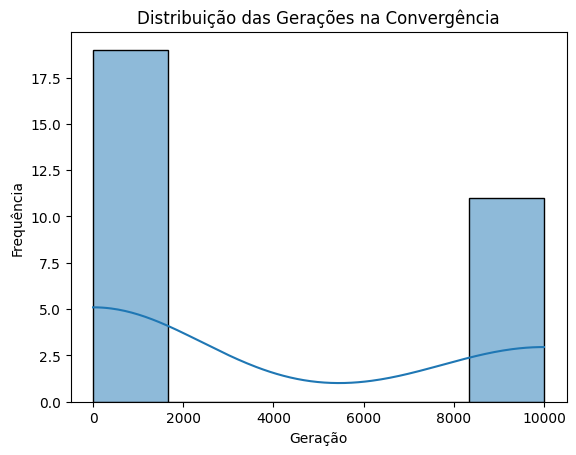

In [ ]:
import itertools
import numpy as np
import pandas as pd
from itertools import permutations
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

def fitness(individuals):
    total_fitness = []
    for chromosome in individuals:
        clashes = 0
        for i in range(8):
            for j in range(i + 1, 8):
                if int(chromosome[i], 2) == int(chromosome[j], 2):
                    clashes += 1
                if abs(i - j) == abs(int(chromosome[i], 2) - int(chromosome[j], 2)):
                    clashes += 1
        total_fitness.append(28 - clashes)
    return total_fitness

def percent_fit(fitness_vector):
    total = sum(fitness_vector)
    return [round(fit / total, 4) for fit in fitness_vector]

def select_parents(total_fitness, individuals):
    parent_indices = np.random.choice(range(len(individuals)), 5)
    parent_fitness = sorted([(idx, total_fitness[idx]) for idx in parent_indices], key=lambda x: x[1])
    return [individuals[parent_fitness[i][0]] for i in range(2)]

def crossover(parent1, parent2):
    cross_point = random.randint(1, 7)
    child1 = np.append(parent1[:cross_point], parent2[cross_point:])
    child2 = np.append(parent2[:cross_point], parent1[cross_point:])
    return np.array([child1, child2])

def mutate(chromosome):
    gene1, gene2 = random.sample(range(8), 2)
    chromosome[gene1], chromosome[gene2] = chromosome[gene2], chromosome[gene1]
    return chromosome

def generate_population(population_size, fitness_total, individuals):
    new_generation = []
    parents = [select_parents(fitness_total, individuals) for _ in range(population_size // 2)]
    for parent1, parent2 in parents:
        if random.uniform(0, 1) < 0.9:  # crossover probability
            children = crossover(parent1, parent2)
            new_generation.extend(children)
    return np.array(new_generation)

def apply_mutation(new_generation):
    for i in range(len(new_generation)):
        if random.uniform(0, 1) < 0.7:  # mutation probability
            new_generation[i] = mutate(new_generation[i])
    return new_generation

def evaluate(new_generation, individuals, population_size, n_elites=5):
    # Combine a geração atual e a nova
    combined = np.concatenate((individuals, new_generation), axis=0)

    # Calcule a aptidão total
    fitness_total = fitness(combined)

    # Ordene os indivíduos com base na aptidão
    sorted_individuals = sorted(zip(combined, fitness_total), key=lambda x: x[1], reverse=True)

    # Preserva os 'n_elites' melhores indivíduos
    elites = [ind for ind, _ in sorted_individuals[:n_elites]]

    # Seleciona os melhores indivíduos para formar a nova população, incluindo os elites
    top_individuals = elites + [ind for ind, fit in sorted_individuals[:population_size - n_elites]]

    return np.array(top_individuals), fitness(top_individuals)


def initialize_population(population_size):
    binary_combinations = ["".join(seq) for seq in itertools.product("01", repeat=3)]
    all_permutations = list(permutations(binary_combinations))
    initial_population = [all_permutations[np.random.randint(len(all_permutations))] for _ in range(population_size)]
    return np.array(initial_population)

def run_algorithm(population_size=100, max_iterations=10000, total_convergence=False):
    individuals = initialize_population(population_size)
    for generation in range(max_iterations):
        fitness_total = fitness(individuals)
        new_generation = generate_population(population_size, fitness_total, individuals)
        new_generation = apply_mutation(new_generation)
        individuals, fitness_total = evaluate(new_generation, individuals, population_size)

        if 28 in fitness_total:
            convergence_count = fitness_total.count(28)
            if total_convergence and convergence_count == population_size:
                return generation + 1, np.mean(fitness_total), convergence_count
            elif not total_convergence:
                return generation + 1, np.mean(fitness_total), convergence_count
    return max_iterations, np.mean(fitness_total), 0

def main():
    start_time = time.time()
    all_generations = []
    all_fitness = []
    convergences = []
    execution_times = []

    for execution in range(30):
        print(f"Execution {execution + 1}")
        generation, avg_fitness, convergence = run_algorithm(total_convergence=False)
        all_generations.append(generation)
        all_fitness.append(avg_fitness)
        convergences.append(convergence)
        print(f"Geração: {generation}, Fitness Médio: {avg_fitness:.3f}, Convergências: {convergence}")

    mean_generation = np.mean(all_generations)
    std_generation = np.std(all_generations)
    total_convergence = sum(convergences)
    mean_fitness = np.mean(all_fitness)
    std_fitness = np.std(all_fitness)
    mean_convergence = np.mean(convergences)
    mean_execution_time = np.mean(execution_times)

    # Print summary results
    print("Resumo:")
    print(f"Média de iterações para convergência: {mean_generation:.3f}")
    print(f"Desvio padrão das iterações de convergência: {std_generation:.3f}")
    print(f"Fitness Médio nas 30 execuções: {mean_fitness:.3f}")
    print(f"Desvio padrão do Fitness: {std_fitness:.3f}")
    print(f"Número de convergências em 30 execuções: {min(total_convergence, 30)}/30")
    print(f"Número de indivíduos convergentes: {total_convergence}")
    print(f"Média de indivíduos convergentes por execução: {mean_convergence:.3f}")

    sns.histplot(all_generations, kde=True)
    plt.xlabel('Geração')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Gerações na Convergência')
    plt.show()


if __name__ == '__main__':
    main()
